# Fake News Detection using Machine Learning.

## 1.Loading Libraries and datasets 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
real_df=pd.read_csv("True.csv")
fake_df=pd.read_csv("Fake.csv")

## 2. Exploratory Data Analysis 

In [34]:
real_df.head()

,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [35]:
fake_df.head()

,title,text,subject,date,Target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [5]:
real_df.columns,fake_df.columns

(Index(['title', 'text', 'subject', 'date'], dtype='object'),
 Index(['title', 'text', 'subject', 'date'], dtype='object'))

In [6]:
real_df.shape,fake_df.shape

((21417, 4), (23481, 4))

In [28]:
real_df.info()
print('\n')
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   Target   21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 502.0+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   Target   23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 550.4+ KB


In [26]:
real_df.describe()

,Target
count,21417.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [25]:
fake_df.describe()

,Target
count,23481.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [32]:
real_df['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [33]:
fake_df['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

### Visualization of most frequent words

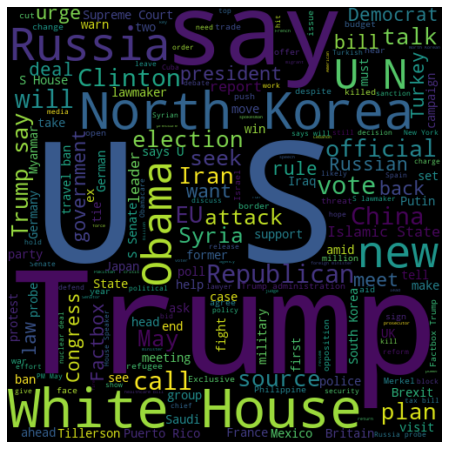

In [10]:
real_words = " ".join([x for x in real_df['title']])
wordcloud1 = WordCloud(width=500, height=500, random_state=40).generate(real_words)


plt.figure(figsize=(20,8))
plt.imshow(wordcloud1,interpolation='bilinear')
plt.axis('off')
plt.show()

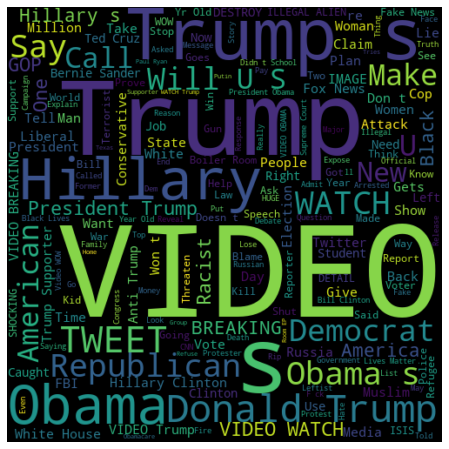

In [11]:
#Visualization of most frequent words
fake_words = " ".join([x for x in fake_df['title']])
wordcloud1 = WordCloud(width=500, height=500, random_state=40).generate(fake_words)


plt.figure(figsize=(20,8))
plt.imshow(wordcloud1,interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
real_df['Target']=1
fake_df['Target']=0

##### Combining both datasets

In [13]:
df=pd.concat([real_df,fake_df])
df.head()

,title,text,subject,date,Target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [14]:
df.tail()

,title,text,subject,date,Target
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   Target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


In [16]:
df.shape

(44898, 5)

In [17]:
df.describe()

,Target
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<AxesSubplot:>

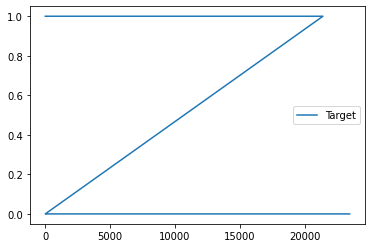

In [18]:
df.plot()

In [19]:
df['Text_len']=df['text'].apply(len)
df['Title_len']=df['title'].apply(len)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   text       44898 non-null  object
 2   subject    44898 non-null  object
 3   date       44898 non-null  object
 4   Target     44898 non-null  int64 
 5   Text_len   44898 non-null  int64 
 6   Title_len  44898 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.1+ MB


In [21]:
df.groupby('Target').describe()

Text_len                                                         \
          count         mean          std  min     25%     50%     75%   
Target                                                                   
0       23481.0  2547.396235  2532.884399  1.0  1433.0  2166.0  3032.0   
1       21417.0  2383.278517  1684.835730  1.0   914.0  2222.0  3237.0   

                Title_len                                                 \
            max     count       mean        std   min   25%   50%    75%   
Target                                                                     
0       51794.0   23481.0  94.198032  27.184433   8.0  77.0  90.0  105.0   
1       29781.0   21417.0  64.667881   9.168999  26.0  59.0  64.0   70.0   

               
          max  
Target         
0       286.0  
1       133.0

In [24]:
df.groupby('Target').median()

,Text_len,Title_len
Target,,
0,2166,90
1,2222,64


0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

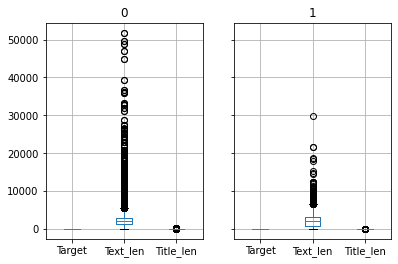

In [22]:
df.groupby('Target').boxplot()

### Insights
- Target=0 is fake data Target=1 is real data.
- Average length of Titles of real data is 94.19 and fake data is 64.66 .
- Length of title fake data is more than that of real data.

## 2.Data Preprocessing

- Delete attributes which are of no use.
     - e.g. "Date" and "Subject" in this case.

In [23]:
df.drop(columns=['date', 'subject'])

,title,text,Target,Text_len,Title_len
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,4659,64
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,4077,64
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,2789,60
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,2461,59
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,5204,69
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0,3237,61
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0,1684,81
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0,25065,85
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0,2685,67


## 3.  Text-Vectorization and Train-Test split of data


### Vectorization
- The process of converting words or text into numbers or vectors are called Text-Vectorization.
   - can be done using :-
       - 1.CountVectorizer()
       - 2.TfidfVectorizer()

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [38]:
X = df['text']
Y = df['Target']

In [39]:
X = cv.fit_transform(X)

### Train-Test split of data
- Splitting dataset into Training and Testing Datasets.
    - Training as 70%
    - Testing as 30%

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 101)

## 4.Modeling

### a. Naive Bayes

In [44]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB()

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
nb_prediction = nb.predict(X_test)

In [48]:
print(classification_report(Y_test, nb_prediction))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6978
           1       0.95      0.95      0.95      6492

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470



In [49]:
print(confusion_matrix(Y_test, nb_prediction))

[[6664  314]
 [ 343 6149]]


#### ~ Accuracy is 95% for Naive Bayes.

### b.Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model1=LogisticRegression()
model1.fit(X_train,Y_train)

c:\users\cromsa\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
prediction=model1.predict(X_test)

In [52]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6978
           1       1.00      1.00      1.00      6492

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [65]:
print(confusion_matrix(Y_test, prediction))

[[6947   31]
 [  32 6460]]


In [53]:
accuracy_score(Y_test,prediction)

0.9953229398663697

#### ~ Accuracy is 99.53% for Logistic Regression.

In [61]:
from sklearn.ensemble import RandomForestClassifier
ref=RandomForestClassifier(n_estimators=135,
    criterion='gini',
    max_depth=None,
    max_features='auto',
    max_leaf_nodes=None,
    bootstrap=True,
    n_jobs=None,
    random_state=25,
)

In [62]:
ref.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=135, random_state=25)

In [63]:
ref.score(X_test,Y_test)

0.9874536005939124

#### ~ Accuracy is 98.74% for Random Forest.

### 5.Comparision Between Models

In [67]:
plot_y=[nb.score(X_test,Y_test),ref.score(X_test,Y_test),accuracy_score(Y_test,prediction)]

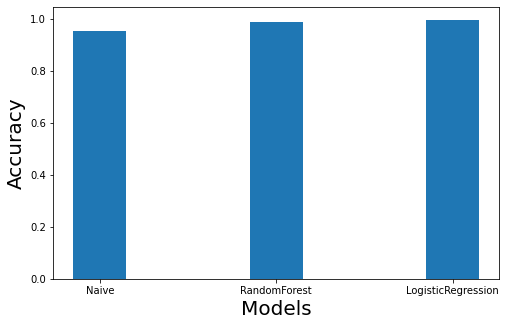

In [68]:
plt.figure(figsize=(8,5))
plt.bar(['Naive','RandomForest','LogisticRegression'],plot_y,width=0.3)
plt.xlabel('Models',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.show()


### Result
    - Logistic Regression gives best results for this.
         ~  Accuracy=99.53%